# Nipype Quickstart
*Written by Michael Notter*

Here we will provide a quick introduction to some of the concepts of [nipype](https://nipype.readthedocs.io/en/latest/). This quick introduction is taken from a very comprehensive [nipype tutorial](https://github.com/miykael/nipype_tutorial). I highly encourage you to spend some time with the tutorial if you are interested in learning about nipype in more detail

![Nipype architecture](https://raw.github.com/satra/intro2nipype/master/images/arch.png)

- [Existing documentation](http://nipype.readthedocs.io/en/latest/)

- [Visualizing the evolution of Nipype](https://www.youtube.com/watch?v=cofpD1lhmKU)

- This notebook is taken from [reproducible-imaging repository](https://github.com/ReproNim/reproducible-imaging)

#### Import a few things from nipype and external libraries

In [1]:
%matplotlib inline

import os
from os.path import abspath, join

from nipype import Workflow, Node, MapNode, Function
from nipype.interfaces.fsl import BET, IsotropicSmooth, ApplyMask

from nilearn.plotting import plot_anat
import matplotlib.pyplot as plt

your_netid = 'f00275v'
data_dir = '/dartfs/rc/lab/P/Psych60/data/ds000114'
output_dir = '/dartfs-hpc/rc/home/v/f00275v/Psych60/students_output/%s/6_nipype' % your_netid

/optnfs/el7/jupyterhub/envs/Psych60-Chang/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Interfaces
Interfaces are the core pieces of Nipype. The interfaces are python modules that allow you to use various external packages (e.g. FSL, SPM or FreeSurfer), even if they themselves are written in another programming language than python.

**Let's try to use `bet` from FSL:**

In [6]:
# will use a T1w from ds000114 dataset
input_file =  join(data_dir, "sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz")

In [7]:
# we will be typing here

If you're lost the code is here:

In [8]:
bet = BET()
bet.inputs.in_file = input_file
bet.inputs.out_file = join(output_dir, "output/T1w_nipype_bet.nii.gz")
res = bet.run()

let's check the output:

In [9]:
res.outputs


inskull_mask_file = <undefined>
inskull_mesh_file = <undefined>
mask_file = <undefined>
meshfile = <undefined>
out_file = /dartfs-hpc/rc/home/v/f00275v/Psych60/students_output/f00275v/6_nipype/output/T1w_nipype_bet.nii.gz
outline_file = <undefined>
outskin_mask_file = <undefined>
outskin_mesh_file = <undefined>
outskull_mask_file = <undefined>
outskull_mesh_file = <undefined>
skull_mask_file = <undefined>

and we can plot the output file

/optnfs/el7/jupyterhub/envs/Psych60-Chang/lib/python3.7/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


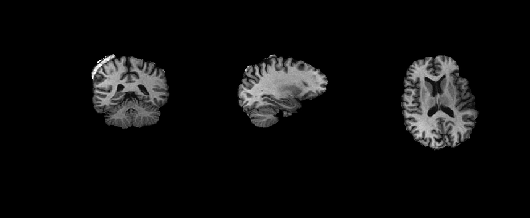

In [10]:
plot_anat(join(output_dir, 'output/T1w_nipype_bet.nii.gz'), 
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

you can always check the list of arguments using `help` method

In [11]:
BET.help()

Wraps the executable command ``bet``.

FSL BET wrapper for skull stripping

For complete details, see the `BET Documentation.
<https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/BET/UserGuide>`_

Examples
--------
>>> from nipype.interfaces import fsl
>>> btr = fsl.BET()
>>> btr.inputs.in_file = 'structural.nii'
>>> btr.inputs.frac = 0.7
>>> btr.inputs.out_file = 'brain_anat.nii'
>>> btr.cmdline
'bet structural.nii brain_anat.nii -f 0.70'
>>> res = btr.run() # doctest: +SKIP

Inputs::

        [Mandatory]
        in_file: (an existing file name)
                input file to skull strip
                argument: ``%s``, position: 0

        [Optional]
        out_file: (a file name)
                name of output skull stripped image
                argument: ``%s``, position: 1
        outline: (a boolean)
                create surface outline image
                argument: ``-o``
        mask: (a boolean)
                create binary mask image
                argument: ``-m``
        skull: 

#### Exercise 1a
Import `IsotropicSmooth` from `nipype.interfaces.fsl` and find out the `FSL` command that is being run. What are the mandatory inputs for this interface?

In [12]:
# type your code here

In [13]:
from nipype.interfaces.fsl import IsotropicSmooth
# all this information can be found when we run `help` method. 
# note that you can either provide `in_file` and `fwhm` or `in_file` and `sigma`
IsotropicSmooth.help()

Wraps the executable command ``fslmaths``.

Use fslmaths to spatially smooth an image with a gaussian kernel.

Inputs::

        [Mandatory]
        fwhm: (a float)
                fwhm of smoothing kernel [mm]
                argument: ``-s %.5f``, position: 4
                mutually_exclusive: sigma
        sigma: (a float)
                sigma of smoothing kernel [mm]
                argument: ``-s %.5f``, position: 4
                mutually_exclusive: fwhm
        in_file: (an existing file name)
                image to operate on
                argument: ``%s``, position: 2

        [Optional]
        out_file: (a file name)
                image to write
                argument: ``%s``, position: -2
        internal_datatype: ('float' or 'char' or 'int' or 'short' or 'double'
                  or 'input')
                datatype to use for calculations (default is float)
                argument: ``-dt %s``, position: 1
        output_datatype: ('float' or 'char' or 'int' 

#### Exercise 1b
Run the `IsotropicSmooth` for `/data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz` file with a smoothing kernel 4mm:

In [14]:
# type your solution here

In [15]:
smoothing = IsotropicSmooth()
smoothing.inputs.in_file = join(data_dir, "sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz")
smoothing.inputs.fwhm = 4
smoothing.inputs.out_file = join(output_dir, "output/T1w_nipype_smooth.nii.gz")
smoothing.run()

/optnfs/el7/jupyterhub/envs/Psych60-Chang/lib/python3.7/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


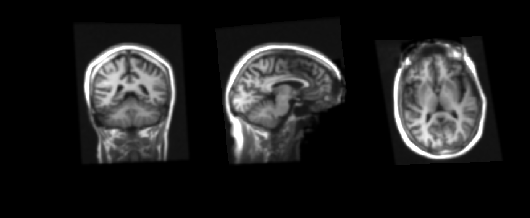

In [16]:
# plotting the output
plot_anat(join(output_dir, join(output_dir, 'output/T1w_nipype_smooth.nii.gz')), 
          display_mode='ortho', dim=-1, draw_cross=False, annotate=False);

## Nodes and Workflows

Interfaces are the core pieces of Nipype that run the code of your desire. But to streamline your analysis and to execute multiple interfaces in a sensible order, you have to put them in something that we call a Node and create a Workflow.

In Nipype, a node is an object that executes a certain function. This function can be anything from a Nipype interface to a user-specified function or an external script. Each node consists of a name, an interface, and at least one input field and at least one output field.

Once you have multiple nodes you can use `Workflow` to connect with each other and create a directed graph. Nipype workflow will take care of input and output of each interface and arrange the execution of each interface in the most efficient way.

**Let's create the first node using `BET` interface:**

In [17]:
# we will be typing here

If you're lost the code is here:

In [18]:
# Create Node
bet_node = Node(BET(), name='bet')
# Specify node inputs
bet_node.inputs.in_file = input_file
bet_node.inputs.mask = True

# bet node can be also defined this way:
#bet_node = Node(BET(in_file=input_file, mask=True), name='bet_node')

#### Exercise 2
Create a `Node` for IsotropicSmooth interface.

In [ ]:
# Type your solution here:

# smooth_node = 

In [19]:
smooth_node = Node(IsotropicSmooth(in_file=input_file, fwhm=4), name="smooth")

**We will now create one more Node for our workflow**

In [20]:
mask_node = Node(ApplyMask(), name="mask")

Let's check the interface:

In [21]:
ApplyMask.help()

Wraps the executable command ``fslmaths``.

Use fslmaths to apply a binary mask to another image.

Inputs::

        [Mandatory]
        mask_file: (an existing file name)
                binary image defining mask space
                argument: ``-mas %s``, position: 4
        in_file: (an existing file name)
                image to operate on
                argument: ``%s``, position: 2

        [Optional]
        out_file: (a file name)
                image to write
                argument: ``%s``, position: -2
        internal_datatype: ('float' or 'char' or 'int' or 'short' or 'double'
                  or 'input')
                datatype to use for calculations (default is float)
                argument: ``-dt %s``, position: 1
        output_datatype: ('float' or 'char' or 'int' or 'short' or 'double'
                  or 'input')
                datatype to use for output (default uses input type)
                argument: ``-odt %s``, position: -1
        nan2zeros: (a 

As you can see the interface takes two mandatory inputs: `in_file` and `mask_file`. We want to use the output of `smooth_node` as `in_file` and one of the output of `bet_file` (the `mask_file`) as `mask_file` input.

** Let's initialize a `Workflow`:**

In [22]:
# will be writing the code here:


if you're lost, the full code is here:

In [23]:
# Initiation of a workflow
wf = Workflow(name="smoothflow", base_dir=join(output_dir, "output/working_dir"))

/optnfs/el7/jupyterhub/envs/Psych60-Chang/lib/python3.7/site-packages/networkx/classes/graph.py:23: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
/optnfs/el7/jupyterhub/envs/Psych60-Chang/lib/python3.7/site-packages/networkx/classes/reportviews.py:95: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, Set, Iterable


It's very important to specify `base_dir` (as absolute path), because otherwise all the outputs would be saved somewhere in the temporary files.

**let's connect the `bet_node` output to `mask_node` input`**

In [ ]:
# we will be typing here:


if you're lost, the code is here:

In [24]:
wf.connect(bet_node, "mask_file", mask_node, "mask_file")

#### Exercise 3
Connect `out_file` of `smooth_node` to `in_file` of `mask_node`.

In [25]:
# type your code here

In [31]:
wf.connect(smooth_node, "out_file", mask_node, "in_file")

Exception: Trying to connect smoothflow.smooth:out_file to smoothflow.mask:in_file but input 'in_file' of node 'smoothflow.mask' is already
connected.


**Let's see a graph describing our workflow:**

190416-10:03:54,39 nipype.workflow INFO:
	 Generated workflow graph: /dartfs-hpc/rc/home/v/f00275v/Psych60/students_output/f00275v/6_nipype/output/working_dir/smoothflow/workflow_graph.png (graph2use=hierarchical, simple_form=True).


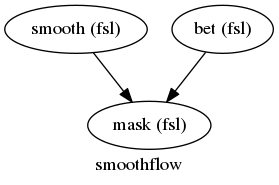

In [34]:
wf.write_graph(join(output_dir, "output/working_dir/smoothflow/workflow_graph.dot"))
from IPython.display import Image
Image(filename=join(output_dir, "output/working_dir/smoothflow/workflow_graph.png"))

you can also plot a more detailed graph:

190416-10:03:57,249 nipype.workflow INFO:
	 Generated workflow graph: /dartfs-hpc/rc/home/v/f00275v/Psych60/students_output/f00275v/6_nipype/output/working_dir/smoothflow/graph.png (graph2use=flat, simple_form=True).


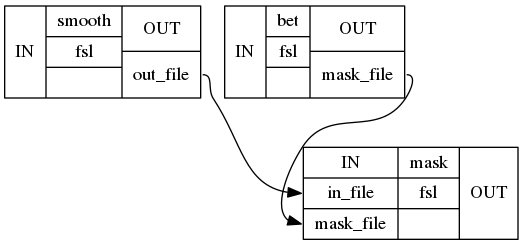

In [35]:
wf.write_graph(graph2use='flat')
from IPython.display import Image
Image(filename=join(output_dir, "output/working_dir/smoothflow/graph_detailed.png"))

**and now let's run the workflow**

In [ ]:
# we will type our code here:

if you're lost, the full code is here:

In [37]:
# Execute the workflow
res = wf.run()

190416-10:04:12,972 nipype.workflow INFO:
	 Workflow smoothflow settings: ['check', 'execution', 'logging', 'monitoring']
190416-10:04:13,127 nipype.workflow INFO:
	 Running serially.
190416-10:04:13,128 nipype.workflow INFO:
	 [Node] Setting-up "smoothflow.smooth" in "/dartfs/rc/lab/P/Psych60/students_output/f00275v/6_nipype/output/working_dir/smoothflow/smooth".
190416-10:04:13,208 nipype.workflow INFO:
	 [Node] Running "smooth" ("nipype.interfaces.fsl.maths.IsotropicSmooth"), a CommandLine Interface with command:
fslmaths /dartfs-hpc/rc/home/v/f00275v/Psych60/data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz -s 1.69864 /dartfs/rc/lab/P/Psych60/students_output/f00275v/6_nipype/output/working_dir/smoothflow/smooth/sub-01_ses-test_T1w_smooth.nii.gz
190416-10:04:30,781 nipype.workflow INFO:
	 [Node] Finished "smoothflow.smooth".
190416-10:04:30,784 nipype.workflow INFO:
	 [Node] Setting-up "smoothflow.bet" in "/dartfs/rc/lab/P/Psych60/students_output/f00275v/6_nipype/output/

**and let's look at the results**

In [38]:
# we can check the output of specific nodes from workflow
list(res.nodes)[0].result.outputs


inskull_mask_file = <undefined>
inskull_mesh_file = <undefined>
mask_file = /dartfs/rc/lab/P/Psych60/students_output/f00275v/6_nipype/output/working_dir/smoothflow/bet/sub-01_ses-test_T1w_brain_mask.nii.gz
meshfile = <undefined>
out_file = <undefined>
outline_file = <undefined>
outskin_mask_file = <undefined>
outskin_mesh_file = <undefined>
outskull_mask_file = <undefined>
outskull_mesh_file = <undefined>
skull_mask_file = <undefined>

We can see the fie structure that has been created.

**NOTE**: `tree` is not currently installed on our system so we can ignore this line for now.

In [2]:
! tree -L 3 {'/dartfs-hpc/rc/home/v/' + your_netid + '/Psych60/students_output/' + your_netid + '/6_nipype/output/working_dir/smoothflow/'}

/dartfs-hpc/rc/home/v/f00275v/Psych60/students_output/f00275v/6_nipype/output/working_dir/smoothflow/
|-- bet
|   |-- _0xea357d12a50dbd994accbae278895201.json
|   |-- command.txt
|   |-- _inputs.pklz
|   |-- _node.pklz
|   |-- _report
|   |   `-- report.rst
|   |-- result_bet.pklz
|   `-- sub-01_ses-test_T1w_brain_mask.nii.gz
|-- d3.js
|-- graph1.json
|-- graph_detailed.dot
|-- graph_detailed.png
|-- graph.dot
|-- graph.json
|-- graph.png
|-- index.html
|-- mask
|   |-- _0xec44a1986ad59e4d922a84d43e4b3528.json
|   |-- command.txt
|   |-- _inputs.pklz
|   |-- _node.pklz
|   |-- _report
|   |   `-- report.rst
|   |-- result_mask.pklz
|   `-- sub-01_ses-test_T1w_smooth_masked.nii.gz
|-- smooth
|   |-- _0x7218167d46551014f0f633e94d8027fc.json
|   |-- command.txt
|   |-- _inputs.pklz
|   |-- _node.pklz
|   |-- _report
|   |   `-- report.rst
|   |-- result_smooth.pklz
|   `-- sub-01_ses-test_T1w_smooth.nii.gz
|-- workflow_graph.dot
`-- workflow_graph.png

6 directories, 31 files


**and we can plot the results:**

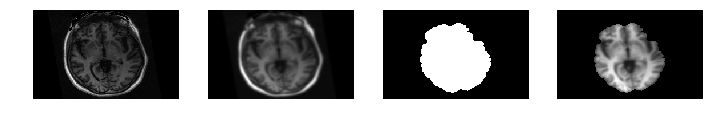

In [44]:
import numpy as np
import nibabel as nb
#import matplotlib.pyplot as plt

# Let's create a short helper function to plot 3D NIfTI images
def plot_slice(fname):

    # Load the image
    img = nb.load(fname)
    data = img.get_data()

    # Cut in the middle of the brain
    cut = int(data.shape[-1]/2) + 10

    # Plot the data
    plt.imshow(np.rot90(data[..., cut]), cmap="gray")
    plt.gca().set_axis_off()

f = plt.figure(figsize=(12, 4))
for i, img in enumerate([join(data_dir, "sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz"),
                         join(output_dir, "output/working_dir/smoothflow/smooth/sub-01_ses-test_T1w_smooth.nii.gz"),
                         join(output_dir, "output/working_dir/smoothflow/bet/sub-01_ses-test_T1w_brain_mask.nii.gz"),
                         join(output_dir, "output/working_dir/smoothflow/mask/sub-01_ses-test_T1w_smooth_masked.nii.gz")]):
    f.add_subplot(1, 4, i + 1)
    plot_slice(img)

## Iterables

Some steps in a neuroimaging analysis are repetitive. Running the same preprocessing on multiple subjects or doing statistical inference on multiple files. To prevent the creation of multiple individual scripts, Nipype has as execution plugin for ``Workflow``, called **``iterables``**. 

![file_tree](../../images/nipype/iterables.png)

Let's assume we have a workflow with two nodes, node (A) does simple skull stripping, and is followed by a node (B) that does isometric smoothing. Now, let's say, that we are curious about the effect of different smoothing kernels. Therefore, we want to run the smoothing node with FWHM set to 2mm, 8mm, and 16mm.

**let's just modify `smooth_node`:** 

In [45]:
# we will type the code here


if you're lost the code is here:

In [46]:
smooth_node_it = Node(IsotropicSmooth(in_file=input_file), name="smooth")
smooth_node_it.iterables = ("fwhm", [4, 8, 16])

we will define again bet and smooth nodes:

In [47]:
bet_node_it = Node(BET(in_file=input_file, mask=True), name='bet_node')
mask_node_it = Node(ApplyMask(), name="mask")

** will create a new workflow with a new `base_dir`:**

In [48]:
# Initiation of a workflow
wf_it = Workflow(name="smoothflow_it", base_dir=join(output_dir, "output/working_dir"))
wf_it.connect(bet_node_it, "mask_file", mask_node_it, "mask_file")
wf_it.connect(smooth_node_it, "out_file", mask_node_it, "in_file")

**let's run the workflow and check the output**

In [49]:
res_it = wf_it.run()

190416-10:16:18,493 nipype.workflow INFO:
	 Workflow smoothflow_it settings: ['check', 'execution', 'logging', 'monitoring']
190416-10:16:18,668 nipype.workflow INFO:
	 Running serially.
190416-10:16:18,670 nipype.workflow INFO:
	 [Node] Setting-up "smoothflow_it.smooth" in "/dartfs/rc/lab/P/Psych60/students_output/f00275v/6_nipype/output/working_dir/smoothflow_it/_fwhm_16/smooth".
190416-10:16:18,731 nipype.workflow INFO:
	 [Node] Running "smooth" ("nipype.interfaces.fsl.maths.IsotropicSmooth"), a CommandLine Interface with command:
fslmaths /dartfs-hpc/rc/home/v/f00275v/Psych60/data/ds000114/sub-01/ses-test/anat/sub-01_ses-test_T1w.nii.gz -s 6.79457 /dartfs/rc/lab/P/Psych60/students_output/f00275v/6_nipype/output/working_dir/smoothflow_it/_fwhm_16/smooth/sub-01_ses-test_T1w_smooth.nii.gz
190416-10:16:57,727 nipype.workflow INFO:
	 [Node] Finished "smoothflow_it.smooth".
190416-10:16:57,730 nipype.workflow INFO:
	 [Node] Setting-up "smoothflow_it.smooth" in "/dartfs/rc/lab/P/Psych60/s

**let's see the graph**

In [50]:
list(res_it.nodes)

[smoothflow_it.bet_node,
 smoothflow_it.mask.a0,
 smoothflow_it.smooth.aI.a0,
 smoothflow_it.mask.a1,
 smoothflow_it.smooth.aI.a1,
 smoothflow_it.mask.a2,
 smoothflow_it.smooth.aI.a2]

We can see the file structure that was created:

In [3]:
! tree -L 3 {'/dartfs-hpc/rc/home/v/' + your_netid + '/Psych60/students_output/' + your_netid + '/6_nipype/output/working_dir/smoothflow/'}

/dartfs-hpc/rc/home/v/f00275v/Psych60/students_output/f00275v/6_nipype/output/working_dir/smoothflow/
|-- bet
|   |-- _0xea357d12a50dbd994accbae278895201.json
|   |-- command.txt
|   |-- _inputs.pklz
|   |-- _node.pklz
|   |-- _report
|   |   `-- report.rst
|   |-- result_bet.pklz
|   `-- sub-01_ses-test_T1w_brain_mask.nii.gz
|-- d3.js
|-- graph1.json
|-- graph_detailed.dot
|-- graph_detailed.png
|-- graph.dot
|-- graph.json
|-- graph.png
|-- index.html
|-- mask
|   |-- _0xec44a1986ad59e4d922a84d43e4b3528.json
|   |-- command.txt
|   |-- _inputs.pklz
|   |-- _node.pklz
|   |-- _report
|   |   `-- report.rst
|   |-- result_mask.pklz
|   `-- sub-01_ses-test_T1w_smooth_masked.nii.gz
|-- smooth
|   |-- _0x7218167d46551014f0f633e94d8027fc.json
|   |-- command.txt
|   |-- _inputs.pklz
|   |-- _node.pklz
|   |-- _report
|   |   `-- report.rst
|   |-- result_smooth.pklz
|   `-- sub-01_ses-test_T1w_smooth.nii.gz
|-- workflow_graph.dot
`-- workflow_graph.png

6 directories, 31 files


you have now 7 nodes instead of 3!

### MapNode

If you want to iterate over a list of inputs, but need to feed all iterated outputs afterward as one input (an array) to the next node, you need to use a **``MapNode``**. A ``MapNode`` is quite similar to a normal ``Node``, but it can take a list of inputs and operate over each input separately, ultimately returning a list of outputs.

Imagine that you have a list of items (let's say files) and you want to execute the same node on them (for example some smoothing or masking). Some nodes accept multiple files and do exactly the same thing on them, but some don't (they expect only one file). `MapNode` can solve this problem. Imagine you have the following workflow:

![file_tree](../../images/nipype/mapnode.png)

Node `A` outputs a list of files, but node `B` accepts only one file. Additionally, `C` expects a list of files. What you would like is to run `B` for every file in the output of `A` and collect the results as a list and feed it to `C`. 

** Let's run a simple numerical example using nipype `Function` interface **

In [51]:
def square_func(x):
    return x ** 2

square = Function(input_names=["x"], output_names=["f_x"], function=square_func)

If I want to know the results only for one `x` we can use `Node`:

In [52]:
square_node = Node(square, name="square")
square_node.inputs.x = 2
res = square_node.run()
res.outputs

190416-10:20:32,950 nipype.workflow INFO:
	 [Node] Setting-up "square" in "/tmp/tmpt00044pj/square".
190416-10:20:32,958 nipype.workflow INFO:
	 [Node] Running "square" ("nipype.interfaces.utility.wrappers.Function")
190416-10:20:32,970 nipype.workflow INFO:
	 [Node] Finished "square".



f_x = 4

let's try to ask for more values of `x`

In [53]:
# NBVAL_SKIP
square_node = Node(square, name="square")
square_node.inputs.x = [2, 4]
res = square_node.run()
res.outputs

190416-10:20:35,600 nipype.workflow INFO:
	 [Node] Setting-up "square" in "/tmp/tmpwc7u5ql7/square".
190416-10:20:35,605 nipype.workflow INFO:
	 [Node] Running "square" ("nipype.interfaces.utility.wrappers.Function")
190416-10:20:35,617 nipype.workflow WARNING:
	 [Node] Error on "square" (/tmp/tmpwc7u5ql7/square)


TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

**It will give an error since `square_func` do not accept list. But we can try `MapNode`:**

In [54]:
square_mapnode = MapNode(square, name="square", iterfield=["x"])
square_mapnode.inputs.x = [2, 4]
res = square_mapnode.run()
res.outputs

190416-10:20:44,357 nipype.workflow INFO:
	 [Node] Setting-up "square" in "/tmp/tmpfppfwzmm/square".
190416-10:20:44,365 nipype.workflow INFO:
	 [Node] Setting-up "_square0" in "/tmp/tmpfppfwzmm/square/mapflow/_square0".
190416-10:20:44,370 nipype.workflow INFO:
	 [Node] Running "_square0" ("nipype.interfaces.utility.wrappers.Function")
190416-10:20:44,377 nipype.workflow INFO:
	 [Node] Finished "_square0".
190416-10:20:44,380 nipype.workflow INFO:
	 [Node] Setting-up "_square1" in "/tmp/tmpfppfwzmm/square/mapflow/_square1".
190416-10:20:44,384 nipype.workflow INFO:
	 [Node] Running "_square1" ("nipype.interfaces.utility.wrappers.Function")
190416-10:20:44,391 nipype.workflow INFO:
	 [Node] Finished "_square1".
190416-10:20:44,396 nipype.workflow INFO:
	 [Node] Finished "square".


Bunch(f_x=[4, 16])

**Notice that `f_x` is a list again!**